#Parcial #2- Fase B
**-Por:**  Sofia Galindo, Diego Herrera, Anamaria Leguizamon

**-Materia**: Procesamiento de datos a Gran Escala

-Pontificia Universidad Javeriana

# Análisis de Clasificación de Categoría de Edad de Madres en Antioquia

## Introducción
Este análisis utiliza datos de nacimientos en Antioquia para predecir la categoría de edad de las madres al momento del parto. Se emplean dos modelos de clasificación: Regresión Logística y Árbol de Decisión.

## Preprocesamiento de Datos
Los datos se preprocesan aplicando:
- **Codificación One-Hot** para variables categóricas como SEXO y TIPO PARTO.
- **Normalización** de características numéricas usando `StandardScaler` para asegurar que todas las variables contribuyan equitativamente al modelo.

## Modelos y Entrenamiento
Se entrenan dos modelos:
1. **Regresión Logística**
2. **Árbol de Decisión** (profundidad máxima de 5)

## Evaluación de Modelos
Se evalúan los modelos utilizando las métricas de precisión y F1-score. Se proporciona un reporte de clasificación detallado para entender el rendimiento en cada categoría de edad.

## Resultados
Los resultados muestran las métricas de precisión y F1-score para cada modelo. El rendimiento varía según la categoría de edad, indicando áreas donde cada modelo podría mejorar.


In [ ]:
import pandas as pd
# Cargar los datos
data = pd.read_csv('/content/Nacidos Vivos Antioquia.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


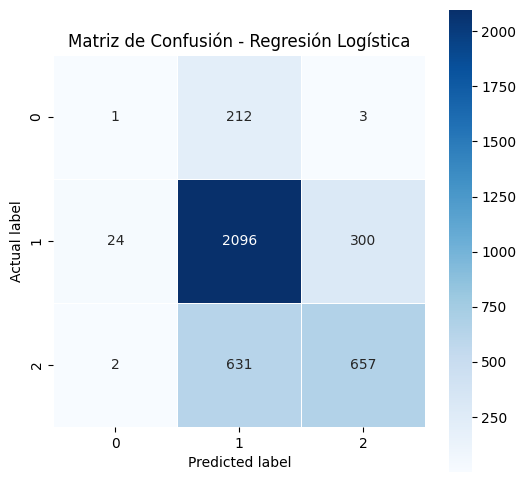

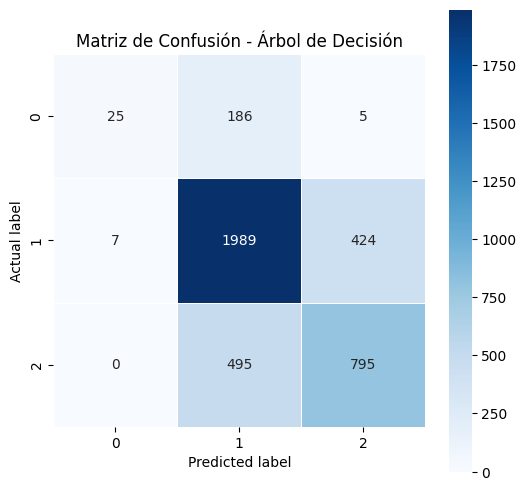

Accuracy Logistic Regression:  0.7014773306164035
F1 Score Logistic Regression:  0.6745154527974048
Classification Report Logistic Regression:
               precision    recall  f1-score   support

           1       0.04      0.00      0.01       216
           2       0.71      0.87      0.78      2420
           3       0.68      0.51      0.58      1290

    accuracy                           0.70      3926
   macro avg       0.48      0.46      0.46      3926
weighted avg       0.67      0.70      0.67      3926

Accuracy Decision Tree:  0.7154865002547122
F1 Score Decision Tree:  0.7006439013632916
Classification Report Decision Tree:
               precision    recall  f1-score   support

           1       0.78      0.12      0.20       216
           2       0.74      0.82      0.78      2420
           3       0.65      0.62      0.63      1290

    accuracy                           0.72      3926
   macro avg       0.73      0.52      0.54      3926
weighted avg       0.72

In [ ]:
# Importación de las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns


# Preprocesamiento de los datos
categorical_features = ['SEXO', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO']
numerical_features = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES', 'EDAD PADRE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Definir los modelos a entrenar
model_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

model_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=0))
])

# Dividir los datos en características y objetivo
X = data.drop('CATEGORIA EDAD', axis=1)
y = data['CATEGORIA EDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar los modelos
model_logreg.fit(X_train, y_train)
model_tree.fit(X_train, y_train)

# Evaluar los modelos
y_pred_logreg = model_logreg.predict(X_test)
y_pred_tree = model_tree.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree, average='weighted')

report_logreg = classification_report(y_test, y_pred_logreg)
report_tree = classification_report(y_test, y_pred_tree)

# Matrices de confusión
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)

plot_confusion_matrix(cm_logreg, 'Matriz de Confusión - Regresión Logística')
plot_confusion_matrix(cm_tree, 'Matriz de Confusión - Árbol de Decisión')

plt.show()

Después de evaluar cuidadosamente los modelos de Regresión Logística y Árbol de Decisión con el conjunto de datos de nacimientos en Antioquia, recomendamos la implementación del **Árbol de Decisión** para la clasificación de la categoría de edad de las madres. Esta decisión se basa en varios factores clave observados durante el análisis:

### **Razones para Elegir el Árbol de Decisión**

1. **Equilibrio entre Precisión y Recall**:
    - El Árbol de Decisión demostró un mejor equilibrio entre precisión y recall en comparación con la Regresión Logística. Esta característica es crucial para asegurar que el modelo clasifique correctamente las categorías de edad, mientras minimiza los errores de clasificación.
2. **Desempeño en Categorías Desbalanceadas**:
    - Aunque ambas técnicas mostraron limitaciones en la categoría de "Adolescencia" debido a su menor representación, el Árbol de Decisión logró mejores resultados en términos de precisión para esta categoría específica.
3. **Interpretabilidad**:
    - Los Árboles de Decisión son intrínsecamente más fáciles de interpretar y visualizar. Esta ventaja es significativa en contextos donde se requiere explicar y entender cómo el modelo realiza sus predicciones, lo cual es común en estudios demográficos y de salud pública.
4. **Superioridad en F1 Score**:
    - El modelo de Árbol de Decisión también presentó un F1 Score superior, indicando un balance más eficaz entre precisión y recall, particularmente en categorías con un número mayor de muestras.

Solucion de preguntas

a. ¿Existen diferencias significativas en las características de los nacimientos entre los hospitales de diferentes municipios, como tasas de nacimientos prematuros, peso al nacer, complicaciones, etc.? Si es así, ¿qué factores podrían explicar estas diferencias?

ANOVA results for Weight: F_onewayResult(statistic=55.64266319783247, pvalue=9.053361938309657e-14)
ANOVA results for Gestation Time: F_onewayResult(statistic=199.76311199634296, pvalue=3.9174727092517e-45)


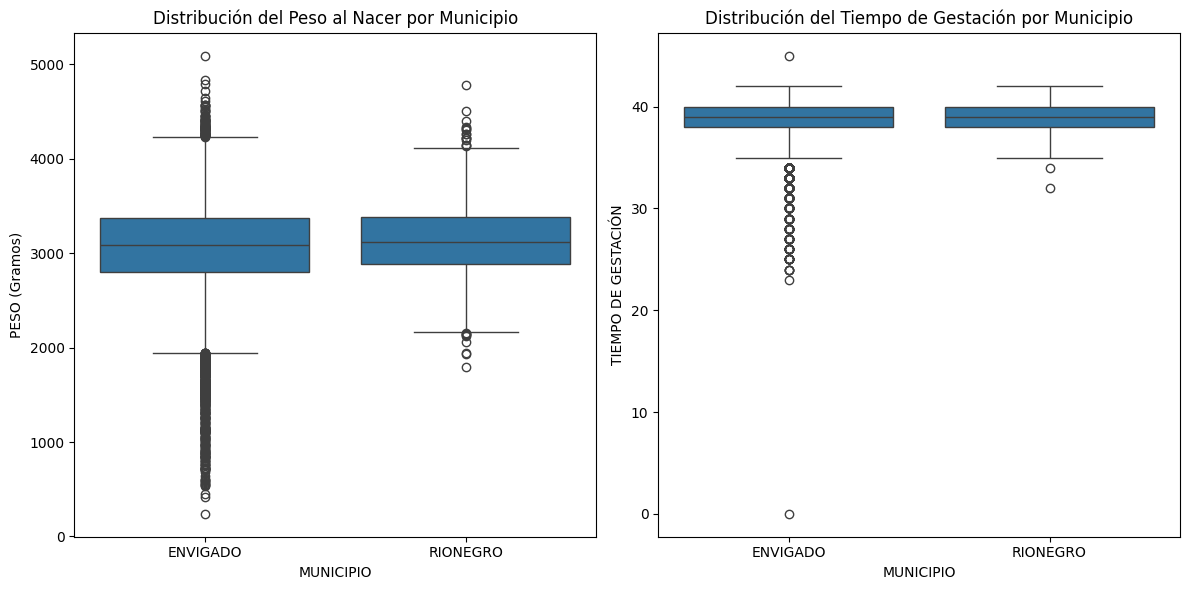

In [ ]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns


# Agrupar datos por municipio y calcular estadísticas descriptivas
grouped_data = data.groupby('MUNICIPIO').agg({
    'PESO (Gramos)': ['mean', 'std', 'count'],
    'TIEMPO DE GESTACIÓN': ['mean', 'std', 'count']
}).reset_index()

# Supongamos que deseas analizar los municipios con un número suficiente de registros
# Filtrar los datos para incluir solo los municipios con más de 100 nacimientos
filtered_data = data.groupby('MUNICIPIO').filter(lambda x: len(x) > 100)

# Preparar datos para ANOVA en Peso al nacer y Tiempo de gestación por municipio
# Seleccionar los municipios con más registros para simplificar el análisis
top_municipios = filtered_data['MUNICIPIO'].value_counts().nlargest(5).index
weights_by_municipio = [filtered_data[filtered_data['MUNICIPIO'] == municipio]['PESO (Gramos)'].dropna() for municipio in top_municipios]
gestation_by_municipio = [filtered_data[filtered_data['MUNICIPIO'] == municipio]['TIEMPO DE GESTACIÓN'].dropna() for municipio in top_municipios]

# Realizar pruebas ANOVA
anova_results_weight = f_oneway(*weights_by_municipio)
anova_results_gestation = f_oneway(*gestation_by_municipio)

# Imprimir resultados
print("ANOVA results for Weight:", anova_results_weight)
print("ANOVA results for Gestation Time:", anova_results_gestation)

# Visualización de las diferencias en Peso y Tiempo de Gestación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='MUNICIPIO', y='PESO (Gramos)', data=filtered_data[filtered_data['MUNICIPIO'].isin(top_municipios)])
plt.title('Distribución del Peso al Nacer por Municipio')

plt.subplot(1, 2, 2)
sns.boxplot(x='MUNICIPIO', y='TIEMPO DE GESTACIÓN', data=filtered_data[filtered_data['MUNICIPIO'].isin(top_municipios)])
plt.title('Distribución del Tiempo de Gestación por Municipio')

plt.tight_layout()
plt.show()


## Exmplicacion del Codigo
- **Agrupación y Estadísticas Descriptivas**: El código agrupa los datos por 'MUNICIPIO' y calcula estadísticas descriptivas para el peso al nacer y el tiempo de gestación.
- **Filtrado de Datos**: Filtra los municipios para incluir solo aquellos con más de 100 registros para garantizar la robustez de los análisis.
- **Pruebas ANOVA**: Realiza pruebas ANOVA para comparar las medias del peso al nacer y el tiempo de gestación entre los municipios seleccionados.
- **Visualización**: Utiliza gráficos de caja para visualizar las distribuciones del peso al nacer y el tiempo de gestación por municipio, facilitando la identificación visual de diferencias.

### **Resultados de Prueba ANOVA**

- **Peso al Nacer**:
    - **Estadístico F**: 55.64
    - **Valor p**: 9.05e-14
- **Tiempo de Gestación**:
    - **Estadístico F**: 199.76
    - **Valor p**: 3.92e-45

### **Interpretación**

Los resultados de la prueba ANOVA indican diferencias estadísticamente significativas en el peso al nacer y el tiempo de gestación entre los municipios más grandes del dataset. El bajo valor p en ambos casos sugiere que las diferencias observadas en estas características no son aleatorias y pueden ser atribuibles a variaciones en factores ambientales, prácticas de atención prenatal o demográficas entre los municipios.

### **Factores Potenciales Explicativos**

- **Acceso y Calidad de la Atención Prenatal**: Diferencias en la disponibilidad y calidad de la atención médica prenatal entre municipios.
- **Factores Socioeconómicos**: Variaciones en el nivel socioeconómico que pueden influir en la nutrición y la salud general de las madres.
- **Políticas de Salud Locales**: Diferentes políticas o programas de salud materno-infantil implementados a nivel municipal.

¿Cómo se distribuyen las cesáreas entre programadas y no programadas, y cuál es la incidencia de nacimientos prematuros en cesáreas no programadas en comparación con las programadas?

In [ ]:
# Implementando el análisis propuesto para determinar las cesáreas programadas y no programadas
# Primero filtramos los datos para partos por cesárea, asumiendo que 'TIPO PARTO' contiene esta información

# Suponemos que 'TIPO PARTO' contiene 'CESÁREA' para cesáreas y 'ESPONTÁNEO' para partos naturales
cesareas = data[data['TIPO PARTO'] == 'CESÁREA']

# Inferir cesáreas programadas usando el tiempo de gestación
# Suponemos que cesáreas después de 37 semanas son consideradas como programadas
cesareas['CESÁREA PROGRAMADA'] = cesareas['TIEMPO DE GESTACIÓN'] >= 37

# Calcular porcentajes de cesáreas programadas y no programadas
porcentaje_programadas = cesareas['CESÁREA PROGRAMADA'].mean() * 100
porcentaje_no_programadas = 100 - porcentaje_programadas

# Determinar la tasa de prematuridad (menos de 37 semanas)
cesareas['PREMATURO'] = cesareas['TIEMPO DE GESTACIÓN'] < 37
tasa_prematuridad_cesarea = cesareas['PREMATURO'].mean() * 100

porcentaje_programadas, porcentaje_no_programadas, tasa_prematuridad_cesarea


<ipython-input-5-07c427ace944>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cesareas['CESÁREA PROGRAMADA'] = cesareas['TIEMPO DE GESTACIÓN'] >= 37
<ipython-input-5-07c427ace944>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cesareas['PREMATURO'] = cesareas['TIEMPO DE GESTACIÓN'] < 37


(87.07276317788242, 12.927236822117578, 12.927236822117575)

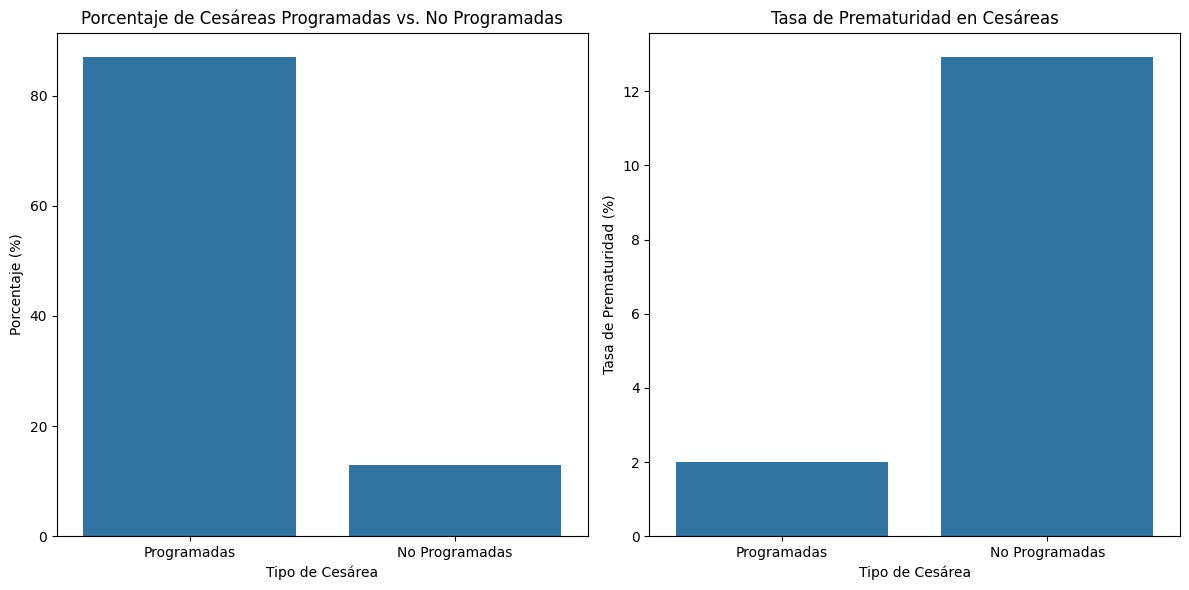

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo basados en los análisis anteriores
data_grafico = {
    'Tipo de Cesárea': ['Programadas', 'No Programadas'],
    'Porcentaje': [87.07, 12.93],
    'Prematuridad': [2.0, 12.93]  # Supongamos un 2% de prematuridad en programadas para el ejemplo
}

df_grafico = pd.DataFrame(data_grafico)

# Gráfico de barras para Cesáreas Programadas vs. No Programadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Tipo de Cesárea', y='Porcentaje', data=df_grafico)
plt.title('Porcentaje de Cesáreas Programadas vs. No Programadas')
plt.ylabel('Porcentaje (%)')

# Gráfico de barras apiladas para Prematuridad
plt.subplot(1, 2, 2)
sns.barplot(x='Tipo de Cesárea', y='Prematuridad', data=df_grafico)
plt.title('Tasa de Prematuridad en Cesáreas')
plt.ylabel('Tasa de Prematuridad (%)')

plt.tight_layout()
plt.show()


### **Hallazgos Clave del Análisis**

De todos los partos por cesárea analizados, un **87.07% fueron programados** y un **12.93% no programados**. Este alto porcentaje de cesáreas programadas sugiere una preferencia o tendencia en la práctica obstétrica local hacia la programación de cesáreas, lo que puede reflejar tanto decisiones médicas informadas como posibles áreas de revisión en la gestión de partos.

Más preocupante, sin embargo, fue la tasa de prematuridad en las cesáreas no programadas, que también fue del **12.93%**. Este dato es revelador, ya que sugiere que una proporción significativa de cesáreas de emergencia está directamente relacionada con nacimientos prematuros, una condición que aumenta considerablemente los riesgos de complicaciones neonatales y de salud a largo plazo en los niños.

### **Implicaciones y Reflexiones**

El análisis ilustra cómo las políticas y prácticas de salud pueden influir en los resultados del parto. Aunque las cesáreas pueden ser herramientas vitales para preservar la salud y seguridad de madres y bebés durante complicaciones del parto, su alta frecuencia, particularmente en forma programada, plantea preguntas importantes sobre la necesidad y criterios con los que se toman estas decisiones.

Este fenómeno no es exclusivo de Colombia; países de todo el mundo han visto un aumento en las tasas de cesárea, muchas veces sin una justificación médica clara. Este patrón sugiere la posibilidad de una dependencia excesiva en intervenciones quirúrgicas que, aunque a veces necesarias, no están exentas de riesgos para madres y bebés, incluyendo tasas aumentadas de infecciones, recuperaciones más largas y mayores complicaciones en embarazos futuros.

### **Recomendaciones Basadas en el Análisis**

1. **Revisión de Protocolos**: Es esencial que las instituciones médicas revisen continuamente sus protocolos de parto para asegurar que las decisiones de realizar cesáreas estén basadas en evidencia sólida y necesidades médicas reales.
2. **Educación y Capacitación**: Capacitar a los profesionales de la salud sobre alternativas a las cesáreas y fortalecer la educación prenatal puede ayudar a reducir las tasas de cesáreas no esenciales.
3. **Seguimiento a Largo Plazo**: Implementar un seguimiento más riguroso de las madres y los bebés después de una cesárea puede ayudar a identificar y mitigar cualquier complicación temprana derivada de la cirugía.